In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 데이터 로드 및 확인 

In [3]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 중복값 제거

In [5]:
df.duplicated().sum()

31994

In [6]:
df.drop_duplicates(keep='first', inplace=True)
df.info() # 11만개의 데이터에서 3만2천개 가량이 중복되었고, 이를 제거한 후 8만7천개 가량의 데이터가 남았다

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

## 결측치 확인 및 일부 열 제거

In [7]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [8]:
# agent와 company 모두 NaN인 행의 수 : 약 7000개
len(df[df.agent.isnull() & df.company.isnull()])

7123

In [9]:
# agent와 company는 결측치가 많으며 부수적인 정보이므로 해당 열을 삭제
df = df.drop(columns=['agent', 'company'], axis=1)
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Arrival_date 관련 column 정리

### Arrival 관련 열들의 특성   
1. arrival_date_year : 2015, 2016, 2017 세 개의 연도만 있으며 dtype=int
2. arrival_date_month : January ~ December로 총 12개의 종류가 있으며 dtype=object
3. arrival_date_day_of_month : 1 ~ 31로 총 31개의 종류가 있으며 dtype=int
4. arrival_date_week_number : 1 ~ 53으로 1년을 기준으로 해당하는 날짜가 몇 번째 주인지를 나타냄

In [10]:
df.arrival_date_year.value_counts()

arrival_date_year
2016    42391
2017    31692
2015    13313
Name: count, dtype: int64

In [11]:
df.arrival_date_month.value_counts()

arrival_date_month
August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: count, dtype: int64

In [12]:
print(len(df.arrival_date_day_of_month.value_counts()))
df.arrival_date_day_of_month.value_counts()

31


arrival_date_day_of_month
17    3020
2     3016
26    3000
5     2980
16    2959
19    2949
12    2929
28    2929
18    2924
11    2915
20    2915
27    2902
29    2880
9     2878
15    2869
25    2838
3     2834
21    2823
13    2812
8     2809
6     2805
4     2801
10    2785
23    2776
24    2775
30    2772
1     2770
7     2704
14    2693
22    2601
31    1733
Name: count, dtype: int64

In [13]:
print(len(df.arrival_date_week_number.value_counts()))
df.arrival_date_week_number.value_counts()

53


arrival_date_week_number
33    2793
34    2491
32    2449
28    2344
30    2335
31    2287
29    2197
27    2166
35    2105
18    2089
21    2044
15    1989
17    1878
23    1872
20    1843
13    1818
19    1813
25    1786
22    1753
24    1746
26    1739
16    1737
14    1693
41    1663
11    1658
38    1635
7     1630
10    1630
36    1626
43    1605
39    1590
9     1579
12    1573
44    1550
8     1525
37    1474
42    1445
40    1427
53    1423
45    1315
6     1299
47    1289
48    1199
49    1170
46    1141
4     1125
5     1101
52    1061
50    1053
3     1050
2      945
1      862
51     786
Name: count, dtype: int64

### Arrival 관련 열들의 처리
1. year, month, day를 합쳐서 '2017-01-01' 형식으로 'arrival_date' 열을 생성
2. 기존 year, month, day, week_number열 삭제(week_number은 arrival_date로 추론 가능)
3. reservation_status_date와 arrival_date 열의 dtype을 datetime으로 변경

In [14]:
# year 처리
df.arrival_date_year = df.arrival_date_year.astype(str) # 문자열로만 변환

# month 처리
week_dict = dict(list(zip(df.arrival_date_month.value_counts().index, ['08', '07', '05', '04', '06', '03', '10', '09', '02', '12', '11', '01'])))
df.arrival_date_month = df.arrival_date_month.apply(lambda x : week_dict[x]) # 해당하는 달을 2자리 문자열로 변경

# day 처리
df.arrival_date_day_of_month = df.arrival_date_day_of_month.apply(lambda x : '0' + str(x) if len(str(x))==1 else str(x))    # 2자리 문자열로 변경

# '2015-07-01' 꼴로 만들어서 arrival_date를 새로운 열로 추가
df['arrival_date'] = df['arrival_date_year'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month']

# 기존 year, month, day와 week_number 열을 제거
df = df.drop(columns=['arrival_date_month', 'arrival_date_year', 'arrival_date_day_of_month', 'arrival_date_week_number'], axis=1) 

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [15]:
# 날짜를 나타내는 reservation_status_date와 arrival_date 열의 데이터 타입을 datetime으로 변경
df.reservation_status_date = pd.to_datetime(df.reservation_status_date)
df.arrival_date = pd.to_datetime(df.arrival_date)

In [16]:
df.arrival_date.dtype

dtype('<M8[ns]')

<의문점>
reservation_status가 Canceled 혹은 No-show인 경우 arrival_date가 있는 것이 맞나?   
reservation_status_date에 해당 reservation_status가 갱신된 날짜가 기록되어 있는데 arrival date는 그러면 무엇을 의미하는가?

## stays_in_week_nights, stays_in_weekend_nights 처리 

### 1. 값의 종류 확인하기 

In [17]:
df.stays_in_week_nights.value_counts()

stays_in_week_nights
1     22191
2     20744
3     16259
5      9663
4      7874
0      6175
6      1379
10      972
7       967
8       613
9       219
15       68
11       50
20       41
12       40
13       27
14       25
19       21
21       15
16       13
22        7
25        6
18        6
30        5
17        4
24        2
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: count, dtype: int64

In [18]:
df.stays_in_weekend_nights.value_counts()

stays_in_weekend_nights
0     35151
2     26414
1     22657
4      1734
3      1150
6       113
5        70
8        60
7        15
9        10
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: count, dtype: int64

### 2. 머무른 밤의 합이 0일인 경우는 이상치인가? 

In [19]:
df[(df.stays_in_weekend_nights == 0) & (df.stays_in_week_nights == 0)].T

# 주중에 보낸 밤과 주말에 보낸 밤이 모두 0인 경우도 있을 수 있다 --> 이상치가 아니다
# 왜냐하면 check-out이고 reservation_status_date와 arrival_date가 같기 때문이다

,0,1,167,168,196,197,459,568,569,618,...,113437,113930,114678,114908,115482,115483,117701,118029,118631,118963
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,111,0,8,8,6,0,0,16,...,22,0,17,1,15,15,0,0,78,1
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
stays_in_week_nights,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adults,2,2,2,1,2,2,2,1,2,2,...,1,2,2,0,1,1,2,2,1,2
children,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
babies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
meal,BB,BB,BB,BB,BB,BB,BB,BB,BB,BB,...,SC,BB,BB,BB,BB,SC,BB,BB,BB,BB
country,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,...,NOR,LUX,PRT,PRT,FRA,FRA,PRT,PRT,PRT,PRT


In [20]:
# 머무르는 날의 합이 0인데 checkout된 날과 arrival date가 다른 경우는 하나도 없다 --> 이상치가 아니다
len(df[(df.stays_in_weekend_nights == 0) & (df.stays_in_week_nights == 0) & (df.reservation_status_date != df.arrival_date)])

0

### 3. check-out한 경우, stay_in_week_nights와 stay_in_weekend_nights의 합이 머문 총 날수와 일치하는가?
만약 일치한다면, stay_in_week_nights와 stay_in_weekend_nights를 days_to_stay로 합쳐도 되지 않을까?

In [21]:
df['days_to_stay'] = (df.reservation_status_date - df.arrival_date) # 새로운 열 추가

In [22]:
df.days_to_stay.value_counts()  # datetime이기 때문에 출력 결과에 days가 붙어있다
                                # check-out이 아닌 경우, 음수가 나오기도 한다

days_to_stay
1 days       14022
3 days       12489
2 days       11539
4 days        9434
7 days        5212
             ...  
-329 days        1
-403 days        1
-406 days        1
46 days          1
27 days          1
Name: count, Length: 433, dtype: int64

In [23]:
# days 앞의 정수를 추출해서 재할당한다
df.days_to_stay = df.days_to_stay.astype(str).str.extract(r'(-?\d+)').astype(int) # 음수도 포함

In [24]:
df[df.days_to_stay < 0][['days_to_stay', 'reservation_status', 'reservation_status_date', 'arrival_date']]

,days_to_stay,reservation_status,reservation_status_date,arrival_date
8,-56,Canceled,2015-05-06,2015-07-01
9,-70,Canceled,2015-04-22,2015-07-01
10,-8,Canceled,2015-06-23,2015-07-01
27,-51,Canceled,2015-05-11,2015-07-01
32,-33,Canceled,2015-05-29,2015-07-01
...,...,...,...,...
100829,-3,Canceled,2017-04-05,2017-04-08
106757,-2,Canceled,2017-05-22,2017-05-24
107445,-1,Canceled,2017-06-16,2017-06-17
107980,-7,Canceled,2017-04-05,2017-04-12


In [25]:
df.loc[df.reservation_status != 'Check-Out', 'days_to_stay'] = 0 # check-out이 아닌 경우에는 days_to_stay 열의 값을 0으로 변환

In [26]:
df.days_to_stay.value_counts() # 음수가 없어진 것을 확인할 수 있다

days_to_stay
0     24670
1     14022
3     12489
2     11539
4      9434
7      5212
5      4692
6      2143
10      737
8       667
14      635
9       504
11      262
12      122
13       85
15       37
21       34
28       23
16       17
17       15
22        9
25        7
18        6
19        6
35        5
42        3
29        3
30        2
23        2
48        1
43        1
34        1
57        1
24        1
49        1
56        1
20        1
38        1
45        1
69        1
60        1
46        1
27        1
Name: count, dtype: int64

### 4. Canceled, No-Show의 경우 days_to_stay는 stays_in_week_nights + stays_in_weekend_nights로 구한

In [27]:
# days_to_stay는 check-out이 아닌 경우에도, 예약을 할 때 몇일 머무를 것인지를 나타내기 때문에 
# canceled나 no-show인 경우에는 stays_in_week_nights와 stays_in_weekend_nights의 합으로 값을 할당한다
df.loc[df.reservation_status != 'Check-Out', 'days_to_stay'] = df.stays_in_week_nights + df.stays_in_weekend_nights

In [28]:
# check-out한 경우인데 머문 저녁의 일수가 days_to_stay와 같지 않은 경우 --> 총 24개의 데이터
df[(df.reservation_status == 'Check-Out') & ((df.stays_in_week_nights + df.stays_in_weekend_nights) != df.days_to_stay)][['stays_in_weekend_nights','stays_in_week_nights','days_to_stay', 'reservation_status_date', 'arrival_date', 'reservation_status']]

# 23중 22개의 경우가 arrival한 날 바로 check-out을 한 경우이다
# 여러 일을 숙박하기로 예약해놓고 방문했다가 급하게 check-out을 한 경우도 있을 수 있지 않을까?
# 결론: check-out의 경우 reservation_status_date와 arrival_date의 차를 기준으로 days_to_stay를 계산하기로 한다

,stays_in_weekend_nights,stays_in_week_nights,days_to_stay,reservation_status_date,arrival_date,reservation_status
24,2,5,0,2015-07-01,2015-07-01,Check-Out
313,2,5,0,2015-07-12,2015-07-12,Check-Out
803,0,3,0,2015-07-30,2015-07-30,Check-Out
1657,3,7,0,2015-09-07,2015-09-07,Check-Out
2224,0,3,0,2015-10-06,2015-10-06,Check-Out
2345,2,5,0,2015-10-09,2015-10-09,Check-Out
2407,4,5,0,2015-10-11,2015-10-11,Check-Out
2420,2,5,0,2015-10-12,2015-10-12,Check-Out
5957,2,6,0,2016-05-17,2016-05-17,Check-Out
6755,4,10,0,2016-06-29,2016-06-29,Check-Out


### 5. days_to_stay열 생성이 끝났으니, stays_in_week_nights, stays_in_weekend_nights 열 제거

In [29]:
df.drop(['stays_in_week_nights', 'stays_in_weekend_nights'], axis=1, inplace=True)

In [30]:
df.columns                                    

Index(['hotel', 'is_canceled', 'lead_time', 'adults', 'children', 'babies',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'days_to_stay'],
      dtype='object')

### 6. Canceled나 No-show의 경우 Arrival_Date를 NaN으로 수정
canceled이나 no-show로 호텔에 오지 않은 고객에게 arrival_date가 남아있는 것이 이상하다


In [31]:
df.loc[df.reservation_status != 'Check-Out', ['arrival_date', 'reservation_status_date']] # 총 24024개의 데이터

,arrival_date,reservation_status_date
8,2015-07-01,2015-05-06
9,2015-07-01,2015-04-22
10,2015-07-01,2015-06-23
27,2015-07-01,2015-05-11
32,2015-07-01,2015-05-29
...,...,...
110280,2017-04-25,2017-04-25
111355,2017-06-05,2017-06-05
111924,2017-05-31,2017-05-31
111925,2017-07-17,2017-07-17


In [32]:
df.loc[df.reservation_status != 'Check-Out', 'arrival_date'] = np.NaN

In [33]:
df.loc[df.reservation_status != 'Check-Out', ['arrival_date', 'reservation_status_date']]

# NaT : Not a Time의 약자로 Datetime 데이터에 대해 누락된 값(missing value)를 나타내는 값

,arrival_date,reservation_status_date
8,NaT,2015-05-06
9,NaT,2015-04-22
10,NaT,2015-06-23
27,NaT,2015-05-11
32,NaT,2015-05-29
...,...,...
110280,NaT,2017-04-25
111355,NaT,2017-06-05
111924,NaT,2017-05-31
111925,NaT,2017-07-17


### Adr(Average Daily Rate) : 총 숙박 비용 / 총 숙박일수(nights 기준)
1. 숙박 비용을 숙박 일수로 나눈 adr 값이 0인 행이 1778개 존재한다. --> 일당 숙박비용이 0원인 것은 이상치로 생각된다
2. 숙박 비용은 보통 방의 종류에 따라서 결정되는 경우가 대부분이다. 따라서 Adr이 0이 아니면서 같은 assigned_room_type을 가진 투숙객들의 adr 평균값으로 0인 값을 변경해야한다
3. adr을 활용하여 총 숙박 비용이 산출될 수 있을 것 같다

In [34]:
len(df[df.adr == 0])

1778

In [35]:
rooms = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P']

for r in rooms:
    m = df[(df.assigned_room_type == r) & (df.adr != 0)].adr.mean() # 해당하는 room_type에 대해 adr이 0이 아닌 경우의 평균값을 계산
    df.loc[(df.assigned_room_type == r) & (df.adr == 0), 'adr'] = m # 동일한 room_type에 대해 adr이 0인 경우 미리 계산한 평균값을 할당

# 각각의 assigned_room_type 에 대해 adr이 0이 아닌 투숙객들의 평균값으로 adr 결측치를 채워넣는다.

In [36]:
for i in range(len(rooms)):
    print(rooms[i], df[df.assigned_room_type == rooms[i]].adr.mean()) # assigned_room_type 별로 adr 평균값을 구한다.

A 97.36979447247204
B 98.84437927107062
C 119.49499527856469
D 110.52065230157655
E 121.06684500282326
F 157.24893930799772
G 173.97143094841928
H 174.6019568345324
I 91.03931250000001
K 101.06795918367345
L 8.0
P nan


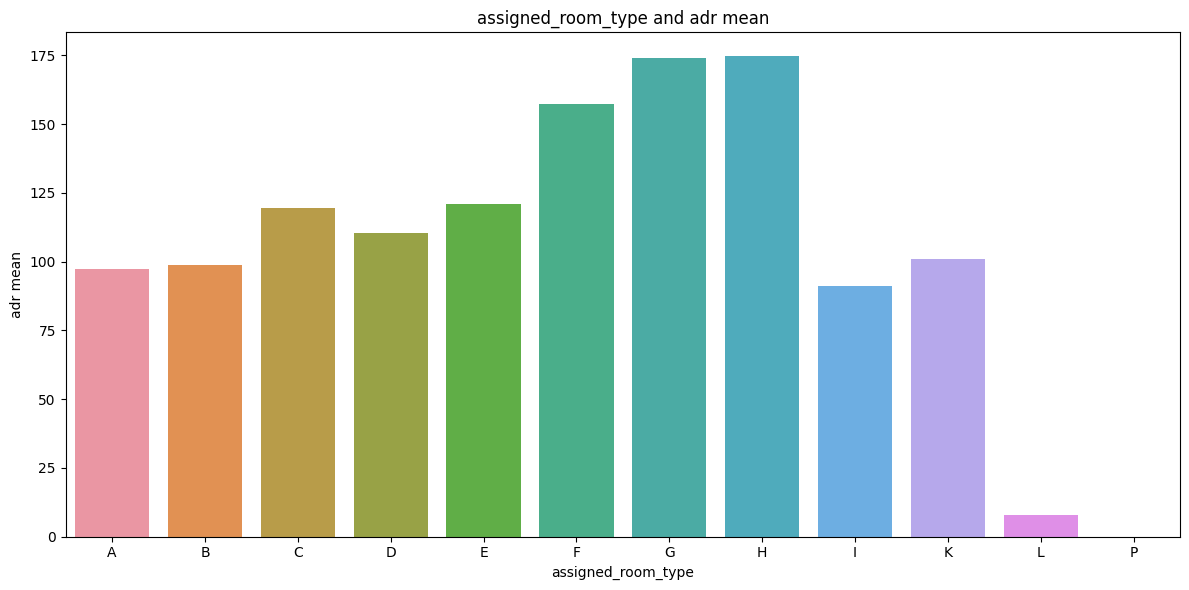

In [37]:
room_to_adr = {}
for i in range(len(rooms)):
    room_to_adr[rooms[i]] = df[df.assigned_room_type == rooms[i]].adr.mean()
room_types = list(room_to_adr.keys())
adrs = list(room_to_adr.values())

# Create a Seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=room_types, y=adrs)
plt.xlabel('assigned_room_type')
plt.ylabel('adr mean')
plt.title('assigned_room_type and adr mean')

# Display the plot
plt.tight_layout()
plt.show()

# room_type 별 adr 값 그래프

In [38]:
df[(df.assigned_room_type == 'I')].country.value_counts() # 아닌 것 같다, 포르투갈의 절대적인 수가 많아서 그런 듯.

country
PRT    197
GBR     54
ESP     26
DEU      9
IRL      9
CN       8
FRA      8
USA      7
NLD      6
CHE      5
SWE      4
BEL      3
ITA      2
AUT      2
QAT      1
ROU      1
FIN      1
AGO      1
BRA      1
CYP      1
POL      1
CIV      1
CHN      1
LTU      1
ZAF      1
Name: count, dtype: int64

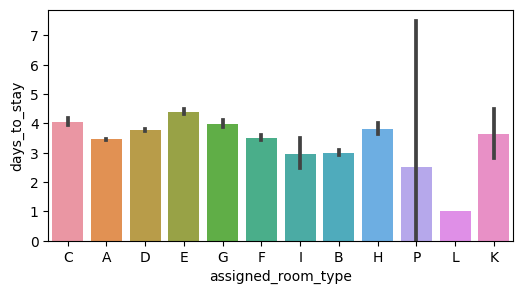

In [39]:
plt.figure(figsize=(6,3))
sns.barplot(data=df, x="assigned_room_type", y="days_to_stay") # assigned_room_type과 days_to_stay의 관계?
plt.show()

In [40]:
df[df.adr.isnull()] # NaN인 경우에는 어떻게 처리?

,hotel,is_canceled,lead_time,adults,children,babies,meal,country,market_segment,distribution_channel,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,days_to_stay
4127,Resort Hotel,1,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,...,No Deposit,0,Transient,NaN,0,0,Canceled,2016-02-15,NaT,0
9376,Resort Hotel,1,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,...,No Deposit,0,Group,NaN,0,0,Canceled,2016-11-21,NaT,0
60651,City Hotel,1,0,0,0.0,0,SC,NaN,Corporate,Direct,...,No Deposit,0,Transient,NaN,0,0,Canceled,2016-11-17,NaT,15
61244,City Hotel,1,0,0,0.0,0,SC,NaN,Complementary,Corporate,...,No Deposit,0,Transient,NaN,0,0,Canceled,2016-12-06,NaT,0
65907,City Hotel,1,0,0,0.0,0,SC,NaN,Complementary,Corporate,...,No Deposit,0,Transient,NaN,0,0,Canceled,2017-04-10,NaT,0
72967,City Hotel,1,0,0,0.0,0,SC,PRT,Online TA,TA/TO,...,No Deposit,0,Transient,NaN,0,0,Canceled,2017-08-11,NaT,0


## 나머지 변수들의 특성 파악

### is_canceled: Label, Target data

In [41]:
# is_canceled가 0인데(취소 안했는데) check-out으로 저장된 경우가 있는가? 
len(df[(df.is_canceled == 0) & (df.reservation_status != 'Check-Out')]) # 0이기 때문에 label인 is_canceled가 잘못된 경우가 없다는 것을 확인할 수 있다

0

### lead_time : PMS(호텔 자산관리 시스템)에 예약한 날과 도착 날 사이의 경과된 날 --> 얼마나 미리 예약을 하였는가

In [42]:
df.lead_time.value_counts()

lead_time
0      5978
1      3216
2      1927
3      1704
4      1570
       ... 
410       1
411       1
371       1
532       1
463       1
Name: count, Length: 479, dtype: int64

In [43]:
df[df.reservation_status != 'Check-Out'][['lead_time', 'reservation_status', 'reservation_status_date', 'arrival_date']]

,lead_time,reservation_status,reservation_status_date,arrival_date
8,85,Canceled,2015-05-06,NaT
9,75,Canceled,2015-04-22,NaT
10,23,Canceled,2015-06-23,NaT
27,60,Canceled,2015-05-11,NaT
32,96,Canceled,2015-05-29,NaT
...,...,...,...,...
110280,132,Canceled,2017-04-25,NaT
111355,4,Canceled,2017-06-05,NaT
111924,7,Canceled,2017-05-31,NaT
111925,6,No-Show,2017-07-17,NaT


### Adults

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   adults                          87396 non-null  int64         
 4   children                        87392 non-null  float64       
 5   babies                          87396 non-null  int64         
 6   meal                            87396 non-null  object        
 7   country                         86944 non-null  object        
 8   market_segment                  87396 non-null  object        
 9   distribution_channel            87396 non-null  object        
 10  is_repeated_guest               87396 non-null  int64         
 11  previo

In [45]:
df.adults.value_counts()

adults
2     64497
1     16503
3      5935
0       385
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

<Axes: >

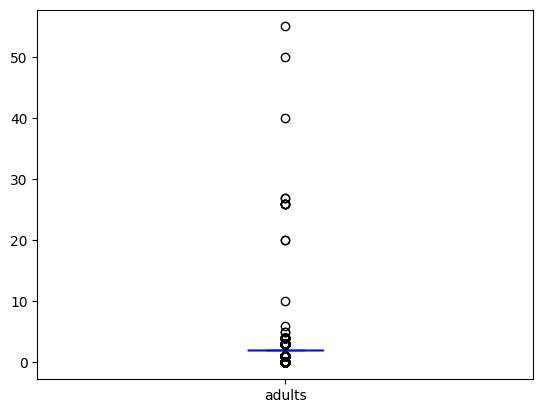

In [46]:
df.plot(kind='box', y='adults', color='blue')

10명 이상인 경우는 이상치로 판단하고 제거하는게 좋을까?

In [47]:
df[df.adults >= 10].T # 모두 cancel된 데이터이다. 이상치로 이해하고 제거해야 할까 아니면 이러한 값들도 is_canceled에 영향을 주는 것이니 남겨두어야 하는 것인가??

,1539,1587,1643,1752,1884,1917,1962,2003,2164,2173,2228,2417,2418
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,1,1,1,1,1,1,1,1,1,1,1,1,1
lead_time,304,333,336,340,347,349,352,354,361,338,328,334,334
adults,40,26,50,26,26,27,27,26,26,55,20,10,20
children,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
babies,0,0,0,0,0,0,0,0,0,0,0,0,0
meal,BB,BB,BB,BB,BB,HB,HB,BB,BB,HB,BB,BB,BB
country,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT
market_segment,Direct,Offline TA/TO,Direct,Offline TA/TO,Offline TA/TO,Direct,Direct,Offline TA/TO,Offline TA/TO,Direct,Direct,Direct,Direct
distribution_channel,Direct,TA/TO,Direct,TA/TO,TA/TO,Direct,Direct,TA/TO,TA/TO,Direct,Direct,Direct,Direct


### Children

In [48]:
df.children.value_counts() # 불필요하게 float형으로 되어있다

children
0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: count, dtype: int64

In [49]:
df.children.isnull().sum() # 결측치도 4개가 있다

4

In [50]:
df[df.children.isnull()].T

,40600,40667,40679,41160
hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,1,1,1,1
lead_time,2,1,1,8
adults,2,2,3,2
children,NaN,NaN,NaN,NaN
babies,0,0,0,0
meal,BB,BB,BB,BB
country,PRT,PRT,PRT,PRT
market_segment,Undefined,Direct,Undefined,Online TA
distribution_channel,Undefined,Undefined,Undefined,Undefined


In [51]:
df.children = df.children.fillna(0) # NaN인 행에는 0을 넣고
df.children = df.children.astype(int) # float형을 int형으로 변환
df.children.value_counts()

children
0     79032
1      4695
2      3593
3        75
10        1
Name: count, dtype: int64

In [52]:
len(df)

87396

In [53]:
df = df[df.children != 10] # children이 10인 데이터는 No-show이기도 하니 삭제
len(df)

87395

### Babies

In [54]:
df.babies.value_counts()

babies
0     86481
1       897
2        15
10        1
9         1
Name: count, dtype: int64

In [55]:
# 이상치로 예상되는 값들을 출력해본다
df[df.babies >= 9].T

,46619,78656
hotel,City Hotel,City Hotel
is_canceled,0,0
lead_time,37,11
adults,2,1
children,0,0
babies,10,9
meal,BB,BB
country,PRT,GBR
market_segment,Online TA,Corporate
distribution_channel,TA/TO,Corporate


In [56]:
df[(df.babies == 2) & (df.assigned_room_type == 'D')].T

,94063
hotel,City Hotel
is_canceled,0
lead_time,4
adults,2
children,0
babies,2
meal,BB
country,DNK
market_segment,Online TA
distribution_channel,TA/TO


<Axes: >

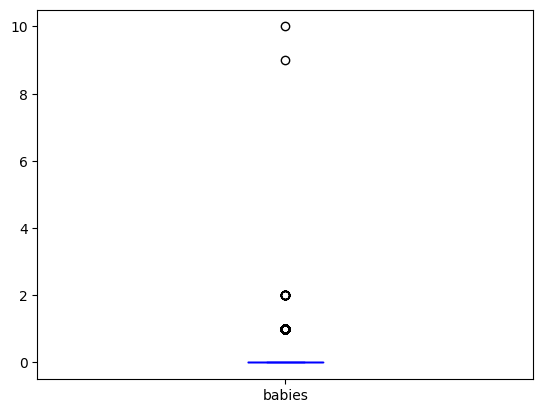

In [57]:
df.plot(kind='box', y='babies', color='blue')

In [58]:
len(df)

87395

In [59]:
df = df[df.babies <= 5] # babies가 5가 넘어가는 데이터는 이상치로 판단하고 삭제 (9인 경우 1개, 10인 경우 1개로 총 2개의 데이터)
len(df)

87393

### Customer_type: 4가지 범주로 분류된 고객의 유형
1. Contract: 장기 계약 고객
2. Group: 단체 예약(그룹 여행, 회의 등)
3. Transient: 개별 고객의 단기 투숙
4. Transient-party: 그룹 단위의 단기 투숙 

In [60]:
df[df.customer_type == 'Contract'].head(10).T

,16,24,26,41,48,51,52,63,80,81
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0,0,0,0,0,1
lead_time,37,127,48,45,90,93,76,93,99,368
adults,2,2,2,2,2,2,2,2,2,2
children,0,0,0,0,0,0,0,0,0,0
babies,0,0,0,0,0,0,0,0,0,0
meal,BB,HB,BB,BB,HB,BB,BB,BB,BB,BB
country,PRT,GBR,IRL,IRL,GBR,IRL,OMN,IRL,FRA,PRT
market_segment,Offline TA/TO,Offline TA/TO,Offline TA/TO,Offline TA/TO,Offline TA/TO,Offline TA/TO,Offline TA/TO,Offline TA/TO,Offline TA/TO,Offline TA/TO
distribution_channel,TA/TO,TA/TO,TA/TO,TA/TO,TA/TO,TA/TO,TA/TO,TA/TO,TA/TO,TA/TO


In [61]:
df[df.customer_type == 'Group'].head(10).T

,539,541,1156,1539,1587,1643,1707,1733,1752,1772
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,1,1,1,1,0,1,0
lead_time,0,0,0,304,333,336,132,1,340,305
adults,2,2,2,40,26,50,2,2,26,2
children,0,0,0,0,0,0,0,2,0,0
babies,0,0,0,0,0,0,0,0,0,0
meal,BB,BB,BB,BB,BB,BB,BB,BB,BB,BB
country,PRT,PRT,GBR,PRT,PRT,PRT,PRT,BRA,PRT,IRL
market_segment,Online TA,Online TA,Online TA,Direct,Offline TA/TO,Direct,Online TA,Online TA,Offline TA/TO,Offline TA/TO
distribution_channel,TA/TO,TA/TO,TA/TO,Direct,TA/TO,Direct,TA/TO,TA/TO,TA/TO,TA/TO


In [62]:
df[df.customer_type == 'Transient'].head(10).T

,0,1,2,3,4,6,7,8,9,10
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0,0,0,1,1,1
lead_time,342,737,7,13,14,0,9,85,75,23
adults,2,2,1,1,2,2,2,2,2,2
children,0,0,0,0,0,0,0,0,0,0
babies,0,0,0,0,0,0,0,0,0,0
meal,BB,BB,BB,BB,BB,BB,FB,BB,HB,BB
country,PRT,PRT,GBR,GBR,GBR,PRT,PRT,PRT,PRT,PRT
market_segment,Direct,Direct,Direct,Corporate,Online TA,Direct,Direct,Online TA,Offline TA/TO,Online TA
distribution_channel,Direct,Direct,Direct,Corporate,TA/TO,Direct,Direct,TA/TO,TA/TO,TA/TO


In [63]:
df[df.customer_type == 'Transient-Party'].head(10).T

,47,50,127,129,130,228,229,260,313,317
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0,0,0,0,0,0
lead_time,113,113,100,100,100,100,100,30,90,90
adults,2,2,2,2,2,3,2,2,2,2
children,0,0,0,0,0,0,0,0,0,0
babies,0,0,0,0,0,0,0,0,0,1
meal,BB,BB,BB,BB,BB,BB,BB,FB,FB,FB
country,NOR,NOR,FRA,FRA,FRA,DNK,DNK,PRT,PRT,PRT
market_segment,Offline TA/TO,Offline TA/TO,Online TA,Online TA,Online TA,Online TA,Online TA,Direct,Offline TA/TO,Offline TA/TO
distribution_channel,TA/TO,TA/TO,TA/TO,TA/TO,TA/TO,TA/TO,TA/TO,Direct,TA/TO,TA/TO


### Room_Type
1. assigned_room_type
2. reserved_room_type 

In [64]:
df.assigned_room_type.value_counts()

assigned_room_type
A    46313
D    22430
E     7195
F     3627
G     2498
C     2165
B     1819
H      706
I      357
K      276
P        6
L        1
Name: count, dtype: int64

In [65]:
df.reserved_room_type.value_counts()

reserved_room_type
A    56551
D    17396
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: count, dtype: int64

In [66]:
for i in df.assigned_room_type.value_counts().index:
    if i not in df.reserved_room_type.value_counts().index: 
        print(i)
# I, K 방이 예약된 적은 없지만 할당된 적이 있는 방들이다

I
K


In [67]:
# room assignment는 No-Show나 Canceled인 경우에도 이미 호텔에 의해 미리 정해지는 것인가?
df[(df.reservation_status != 'Check-Out')  & (df.reserved_room_type != df.assigned_room_type)][['reserved_room_type', 'assigned_room_type', 'reservation_status']]

,reserved_room_type,assigned_room_type,reservation_status
122,E,G,No-Show
467,A,C,No-Show
504,L,C,Canceled
779,A,D,Canceled
792,A,D,Canceled
...,...,...,...
106117,A,K,Canceled
108829,E,F,No-Show
110280,D,K,Canceled
111925,A,D,No-Show


In [68]:
# room_type이 assigned와 reserved에 공통적으로 사용되는 것이 있으므로 labeling할 때 같은 dictionary를 사용하도록 한다
room_type = dict(list(zip(df.assigned_room_type.value_counts().index, range(12))))
room_type

{'A': 0,
 'D': 1,
 'E': 2,
 'F': 3,
 'G': 4,
 'C': 5,
 'B': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'P': 10,
 'L': 11}

In [69]:
# label-encoding
# ML에서는 room_type이 동일하게 배정되었나(1) 그렇지 않나(0)를 기준으로 하나의 열을 추가하고 두 열을 제거하는 방향으로?

### required_car_parking_spaces, total_of_special_requests
두 변수는 is_canceled를 결정하는데 크게 중요한 변수로 보이지 않으며, 결측치도 따로 없고 이상치도 크게 문제되지 않는 수준이다 

In [70]:
df.required_car_parking_spaces.value_counts()

required_car_parking_spaces
0    80080
1     7280
2       28
3        3
8        2
Name: count, dtype: int64

In [71]:
df.required_car_parking_spaces.isnull().any()

False

In [72]:
df = df[df.required_car_parking_spaces <= 3] # 8은 이상치로 보고 삭제

In [73]:
df.total_of_special_requests.value_counts()

total_of_special_requests
0    43892
1    29014
2    11812
3     2317
4      320
5       36
Name: count, dtype: int64

In [74]:
df.total_of_special_requests.isnull().any()

False

### booking_changes

In [75]:
df.booking_changes.value_counts()

booking_changes
0     71494
1     10898
2      3507
3       875
4       356
5       116
6        59
7        31
8        17
9         8
10        6
13        5
14        5
15        3
16        2
17        2
12        2
11        2
20        1
21        1
18        1
Name: count, dtype: int64

<Axes: >

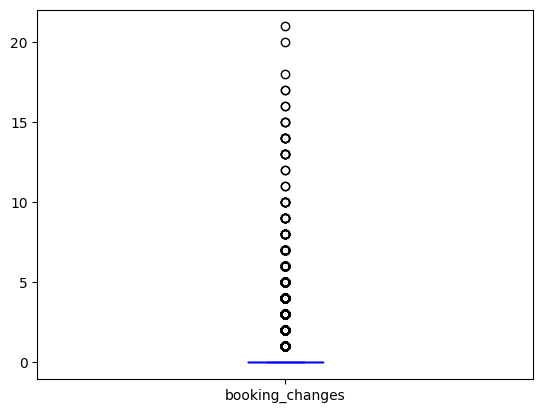

In [76]:
df.plot(kind='box', y='booking_changes', color='blue') # boxplot으로 이상치 파악 

In [77]:
a = df.booking_changes.quantile(0.25)
b = df.booking_changes.quantile(0.75)
print(a, b, b-a)    # IQR을 기준으로는 0 이외의 값은 모두 이상치 --> 이상치로 보고 삭제하는게 맞나?

0.0 0.0 0.0


### deposit_type : 보증금의 종류
1. No Deposit : 무보증금
2. Non Refund : 환불불가 보증금
3. Refundable : 환불 가능한 보증금

In [78]:
df.deposit_type.value_counts()

deposit_type
No Deposit    86246
Non Refund     1038
Refundable      107
Name: count, dtype: int64

In [79]:
df.deposit_type.isnull().any() # 결측치 없음

False

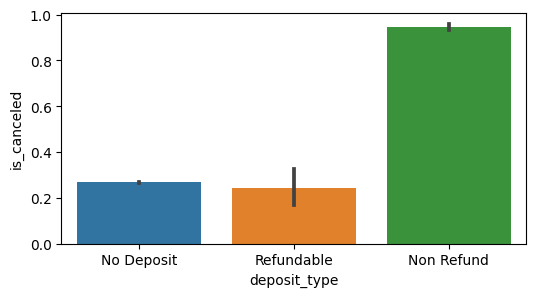

In [80]:
plt.figure(figsize=(6,3))
sns.barplot(data=df, x='deposit_type', y='is_canceled')
plt.show()

### days_in_waiting list
예약이 확정되기 이전까지 waiting list에 있던 날의 수 

In [81]:
df.days_in_waiting_list.value_counts()

days_in_waiting_list
0      86532
63        53
87        25
44        23
15        22
       ...  
79         1
120        1
160        1
85         1
36         1
Name: count, Length: 128, dtype: int64

<Axes: >

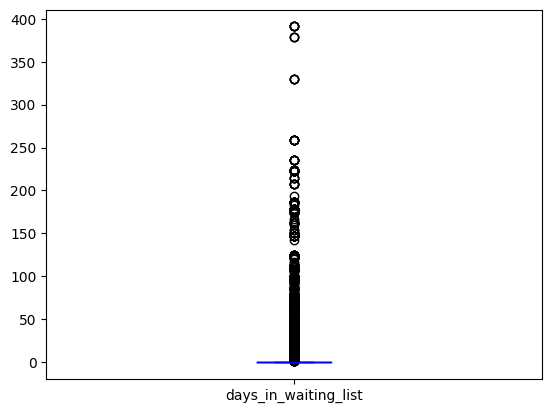

In [82]:
df.plot(kind='box', y='days_in_waiting_list', color='blue')

In [83]:
df['waiting_list_bins'] = pd.cut(df['days_in_waiting_list'], bins=10, labels=False)

In [84]:
df.waiting_list_bins.value_counts()

waiting_list_bins
0    86805
1      298
2      127
3       56
4       53
5       24
6       16
9        8
8        4
Name: count, dtype: int64

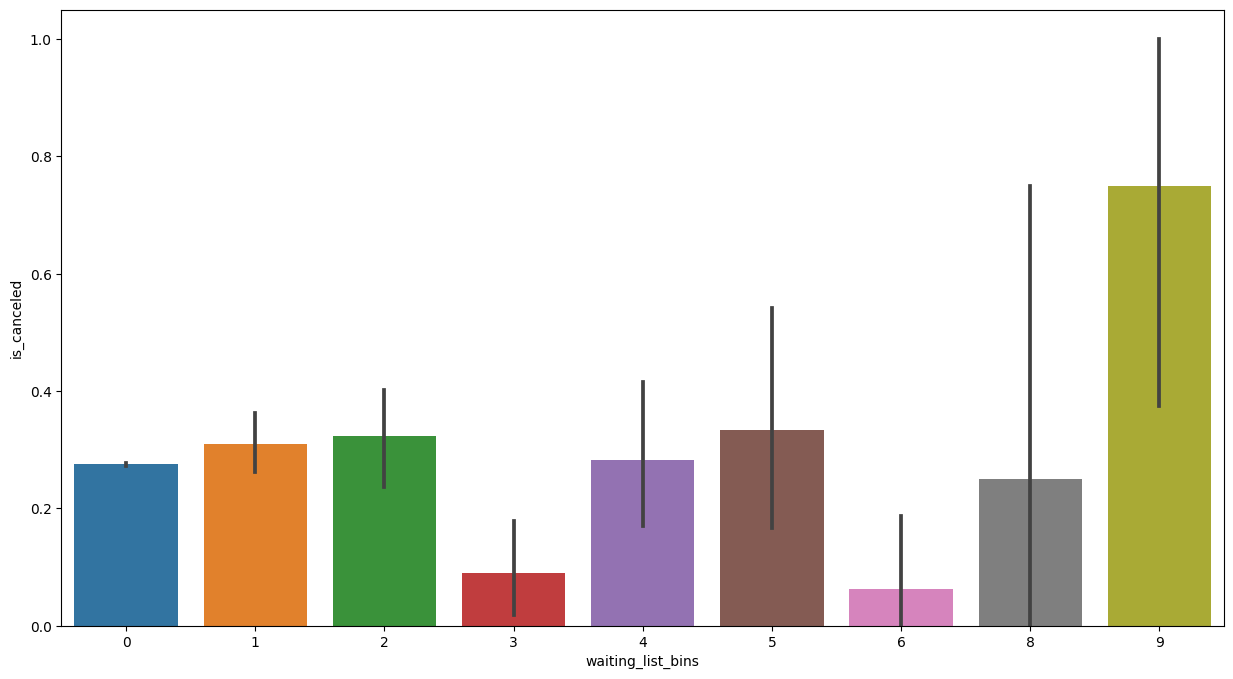

In [85]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='waiting_list_bins', y='is_canceled')
plt.show()

<Axes: >

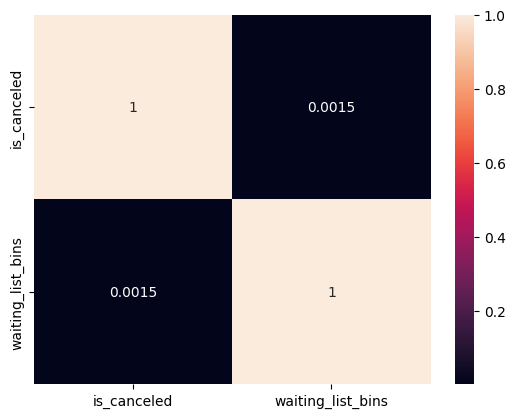

In [86]:
sns.heatmap(df[['is_canceled','waiting_list_bins']].corr(), annot=True) #

In [87]:
df.drop('waiting_list_bins', axis=1, inplace=True) # 구간을 나누더라도 0을 제외한 구간의 데이터가 현저히 적으며 is_canceled와 상관성도 적어보이기 때문에 해당 열은 삭제한다

In [88]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'adults', 'children', 'babies',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'days_to_stay'],
      dtype='object')

### is_repeated_guest, previous_cancellations, previous_bookings_not_canceled 

In [89]:
df.is_repeated_guest.value_counts()

is_repeated_guest
0    83978
1     3413
Name: count, dtype: int64

In [90]:
df.is_repeated_guest.isnull().any()

False

In [91]:
df.previous_cancellations.value_counts()

previous_cancellations
0     85706
1      1407
2       112
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
14        1
19        1
21        1
Name: count, dtype: int64

In [92]:
df.previous_bookings_not_canceled.value_counts()

previous_bookings_not_canceled
0     83848
1      1482
2       578
3       331
4       228
      ...  
47        1
49        1
50        1
51        1
72        1
Name: count, Length: 73, dtype: int64

<Axes: >

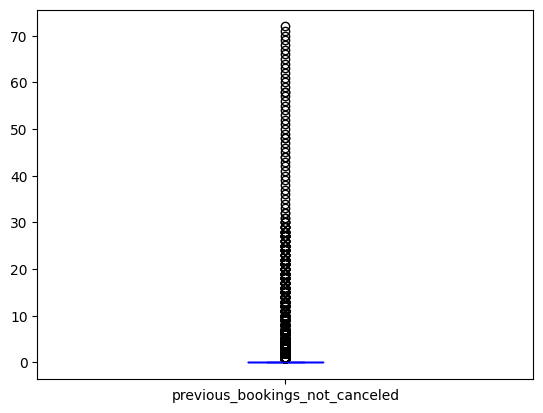

In [93]:
df.plot(kind='box', y='previous_bookings_not_canceled', color='blue')

In [94]:
len(df[df.previous_bookings_not_canceled >= 30]) # 30이상으로해도 51개밖에 되지 않는다

51

<Axes: xlabel='previous_bookings_not_canceled', ylabel='Count'>

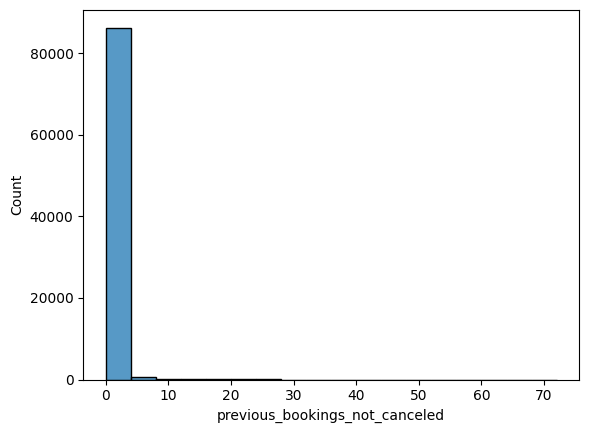

In [95]:
sns.histplot(df.previous_bookings_not_canceled)

<Axes: xlabel='log_pbnc', ylabel='Count'>

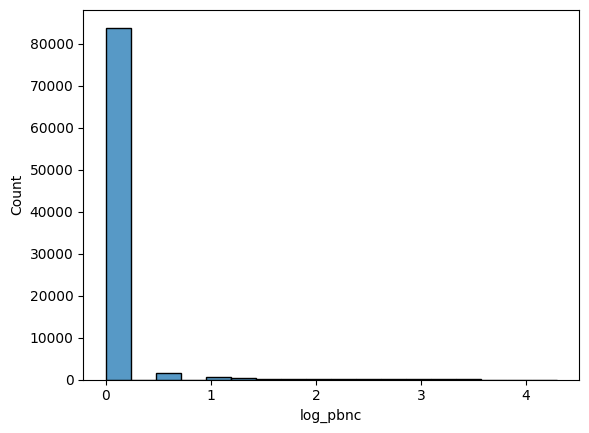

In [96]:
df['log_pbnc']=np.log(df['previous_bookings_not_canceled'] + 1) # 0인 데이터도 로그 변환을 적용하기 위해 1을 더해주고 로그 변환을 한 후
sns.histplot(df.log_pbnc)   # 해당 열에 대해 histplot을 그려보았는데, 여전히 값이 너무 한 쪽으로 편중되어 있다는 것을 알 수 있다

In [97]:
df.drop('log_pbnc', axis=1, inplace=True) # 불필요한 것 같아 해당 열을 다시 삭제했다

### Country 

In [98]:
df.country.value_counts()

country
PRT    27451
GBR    10432
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

In [99]:
df.country.isnull().sum()

452

<Axes: xlabel='country', ylabel='count'>

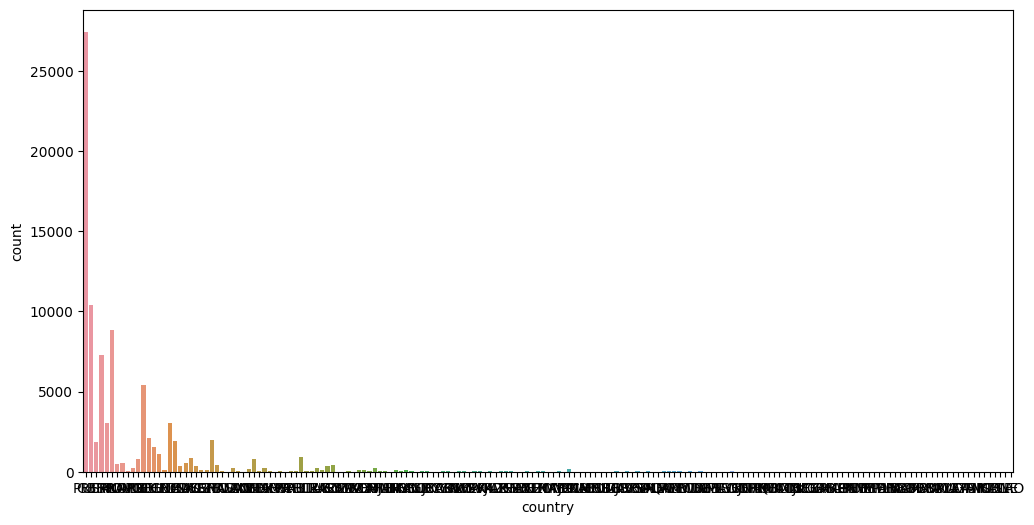

In [100]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country')

In [101]:
df[df.country.isnull()] # 해당 데이터를 임의의 값으로 대체하는 것은 크게 의미가 있어보이지 않는다.(삭제하거나 최빈값으로 채우는 것을 고려해볼 수 있다)

,hotel,is_canceled,lead_time,adults,children,babies,meal,country,market_segment,distribution_channel,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,days_to_stay
30,Resort Hotel,0,118,1,0,0,BB,NaN,Direct,Direct,...,No Deposit,0,Transient,62.0,0,2,Check-Out,2015-07-15,2015-07-01,14
4127,Resort Hotel,1,0,0,0,0,SC,NaN,Offline TA/TO,TA/TO,...,No Deposit,0,Transient,NaN,0,0,Canceled,2016-02-15,NaT,0
7092,Resort Hotel,1,8,1,0,0,BB,NaN,Corporate,Corporate,...,No Deposit,0,Transient,73.0,0,2,Canceled,2016-07-20,NaT,1
7860,Resort Hotel,1,39,2,0,0,HB,NaN,Direct,Direct,...,No Deposit,0,Transient,159.0,0,5,Canceled,2016-07-22,NaT,5
8779,Resort Hotel,1,0,1,0,0,BB,NaN,Corporate,Corporate,...,No Deposit,0,Transient,50.0,0,0,Canceled,2016-10-13,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60651,City Hotel,1,0,0,0,0,SC,NaN,Corporate,Direct,...,No Deposit,0,Transient,NaN,0,0,Canceled,2016-11-17,NaT,15
61244,City Hotel,1,0,0,0,0,SC,NaN,Complementary,Corporate,...,No Deposit,0,Transient,NaN,0,0,Canceled,2016-12-06,NaT,0
65907,City Hotel,1,0,0,0,0,SC,NaN,Complementary,Corporate,...,No Deposit,0,Transient,NaN,0,0,Canceled,2017-04-10,NaT,0
80830,City Hotel,0,4,1,0,0,BB,NaN,Groups,TA/TO,...,No Deposit,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26,2015-11-23,3


# 데이터 시각화

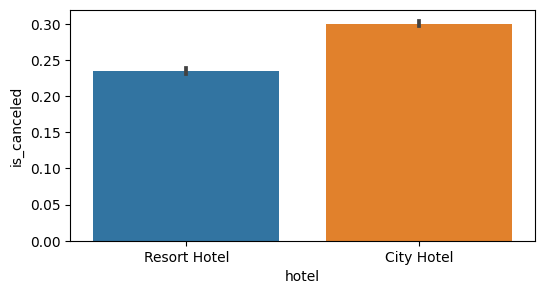

In [102]:
plt.figure(figsize=(6,3))
sns.barplot(data=df, x='hotel', y='is_canceled')
plt.show()

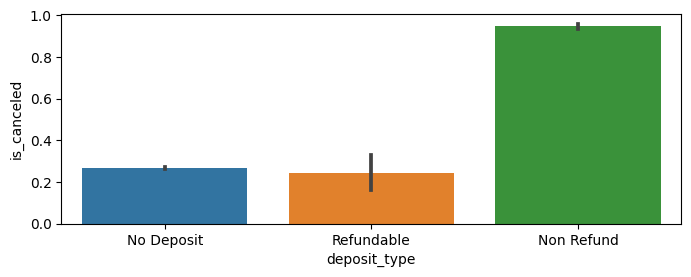

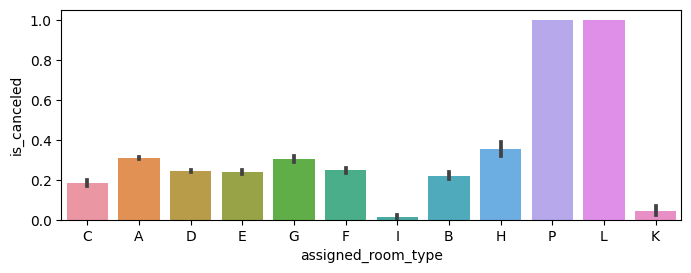

In [103]:
plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
sns.barplot(data=df, x='deposit_type', y='is_canceled')
plt.figure(figsize=(8,6))
plt.subplot(2, 1, 2)
sns.barplot(data=df, x='assigned_room_type', y='is_canceled')
plt.show()

In [104]:
len(df[df.deposit_type == 'No Deposit'])

86246

In [105]:
len(df[(df.deposit_type == 'No Deposit') & df.is_canceled == 0])

64376

In [106]:
len(df[(df.deposit_type == 'No Deposit') & df.is_canceled == 1])

23015

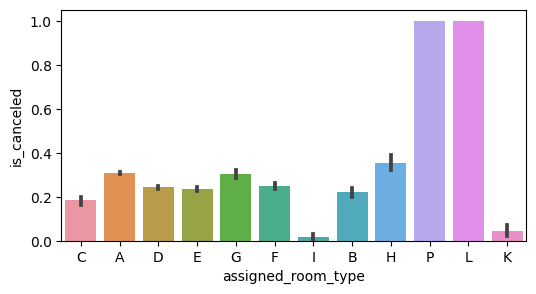

In [108]:
#객실 타입과 예약 취소 -> 객실 타입(가격)에 따라 예약 취소 여부가 달라질까?

plt.figure(figsize=(6,3))
sns.barplot(data=df, x='assigned_room_type', y='is_canceled')
plt.show()

In [112]:
df.assigned_room_type.value_counts() # P와 L은 값이 너무 한정적이기 때문에 유의미한 자료라고 볼 수 없다

assigned_room_type
A    46313
D    22430
E     7195
F     3626
G     2498
C     2165
B     1819
H      706
I      356
K      276
P        6
L        1
Name: count, dtype: int64

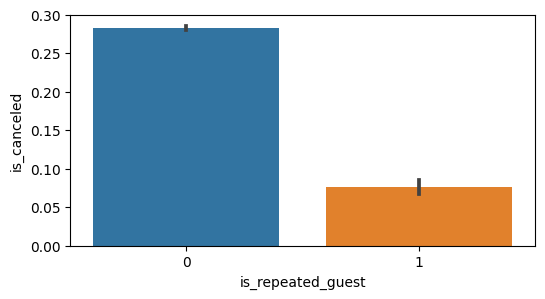

In [109]:
#재방문하는 투숙객의 예약 취소

plt.figure(figsize=(6,3))
sns.barplot(data=df, x='is_repeated_guest', y='is_canceled')
plt.show()

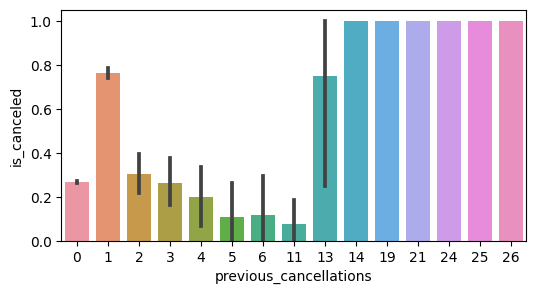

In [110]:
#이전 취소 횟수와 예약 취소
#-> 이전 투숙에서 예약 취소를 하지 않은 고객들은 예약 취소율이 낮지 않을까?

plt.figure(figsize=(6,3))
sns.barplot(data=df, x='previous_cancellations', y='is_canceled')
plt.show()

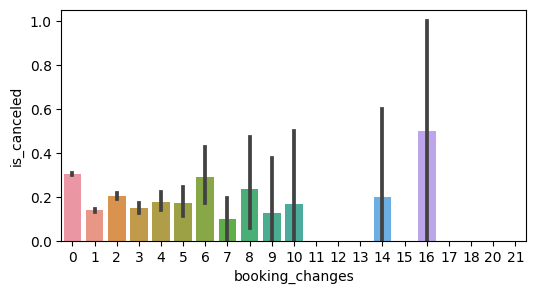

In [111]:
#예약 변경 횟수가 높을수록 예약 취소를 덜 하지 않을까?

plt.figure(figsize=(6,3))
sns.barplot(data=df, x='booking_changes', y='is_canceled')
plt.show()

# 변수 간 상관관계 분석 

In [412]:
df.corr(numeric_only=True)

,is_canceled,lead_time,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,days_to_stay
is_canceled,1.000000,0.184808,0.081810,0.067140,-0.021131,-0.089599,0.051468,-0.052140,-0.093667,0.004553,0.116873,-0.185499,-0.120563,0.084517
lead_time,0.184808,1.000000,0.140485,0.028794,-0.002605,-0.147052,0.005373,-0.078936,0.077055,0.132169,0.004094,-0.087357,0.034245,0.317615
adults,0.081810,0.140485,1.000000,0.023724,0.019322,-0.171789,-0.042098,-0.120922,-0.048061,-0.015781,0.242941,0.007742,0.112761,0.104108
children,0.067140,0.028794,0.023724,1.000000,0.019723,-0.045704,-0.019240,-0.029470,0.030823,-0.020431,0.334701,0.037035,0.044623,0.032600
babies,-0.021131,-0.002605,0.019322,0.019723,1.000000,-0.013732,-0.005715,-0.009807,0.086344,-0.007299,0.029372,0.034705,0.103898,0.019511
is_repeated_guest,-0.089599,-0.147052,-0.171789,-0.045704,-0.013732,1.000000,0.206441,0.441466,0.005946,-0.013514,-0.105842,0.069477,-0.001294,-0.124278
previous_cancellations,0.051468,0.005373,-0.042098,-0.019240,-0.005715,0.206441,1.000000,0.392071,-0.010263,0.003696,-0.042429,-0.003378,0.001870,-0.021607
previous_bookings_not_canceled,-0.052140,-0.078936,-0.120922,-0.029470,-0.009807,0.441466,0.392071,1.000000,0.005402,-0.006454,-0.069148,0.040565,0.027118,-0.064582
booking_changes,-0.093667,0.077055,-0.048061,0.030823,0.086344,0.005946,-0.010263,0.005402,1.000000,0.024091,0.016936,0.048532,0.016117,0.081964
days_in_waiting_list,0.004553,0.132169,-0.015781,-0.020431,-0.007299,-0.013514,0.003696,-0.006454,0.024091,1.000000,-0.032841,-0.020139,-0.049470,-0.010388


<Axes: >

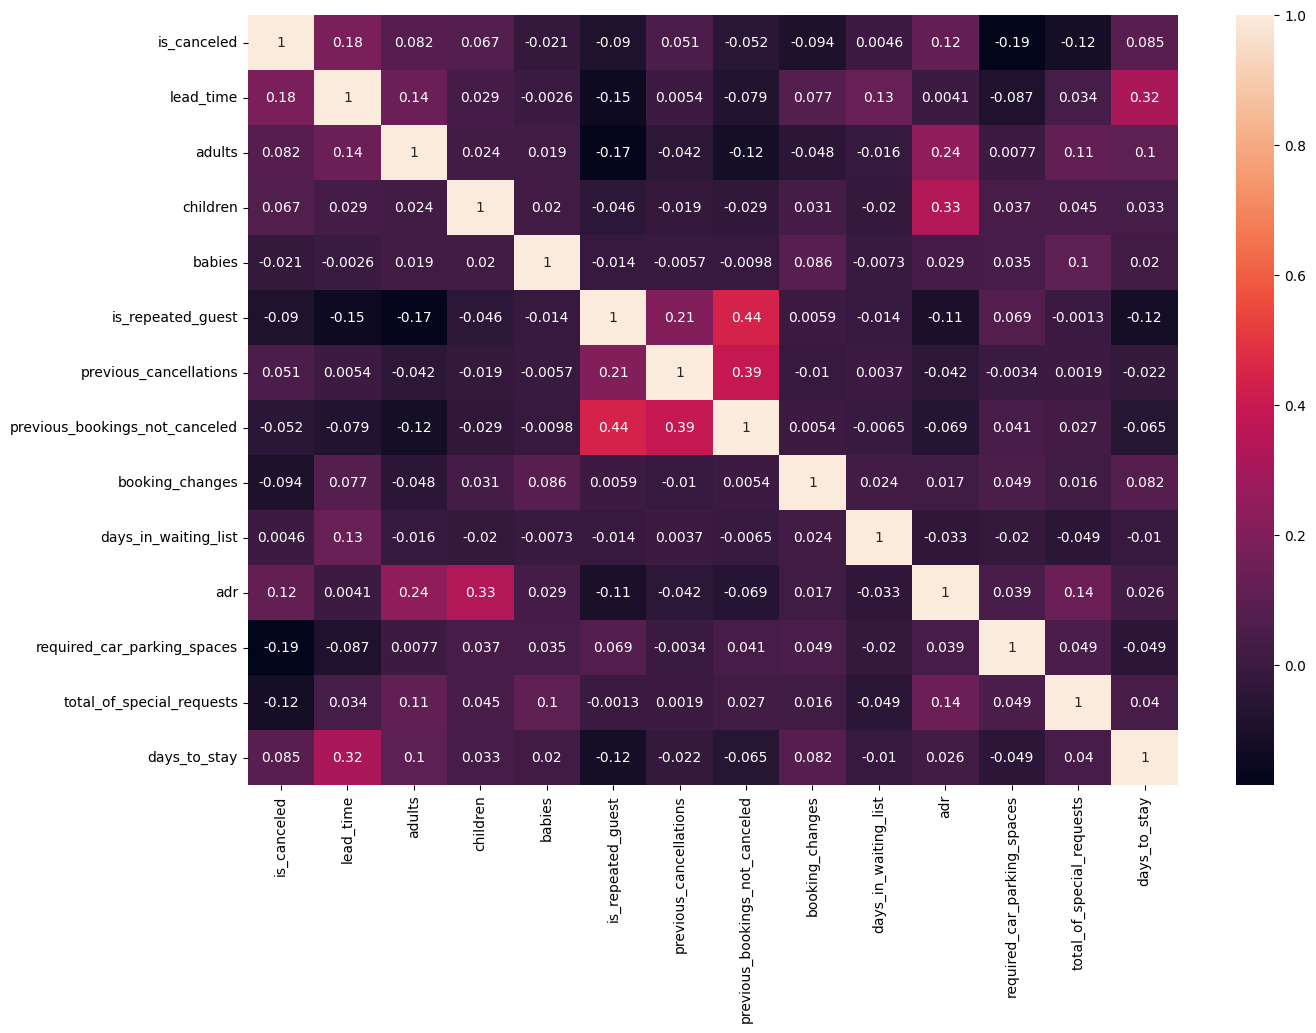

In [419]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True) # 생각보다 is_repeated, previous 등의 열이 상관성이 없어 보인다

# <전처리 프로젝트 결론 및 느낀점>

이번 미니 프로젝트에서 호텔 데이터를 분석할 때, 3조가 중점을 두었던 부분은 직관적으로 상관 관계가 있어 보이는 변수들을 리스트-업 한 뒤에 이 변수들 간의 상관 관계를 보이기 위해 데이터를 전처리 하였다.    
3조가 종속 변수로 두었던 feature 는 is_canceled 이었고, 독립 변수 후보로 직접 찍어보았던 feature 들은 is_repeated_guest, previous_cancellations, booking_changes, assigned_room_types, deposit_types 가 있는데, 실제로 그래프를 그려보니 유의미한 결과를 도출할 수 없었다.    
편향된 데이터가 많다는 느낌을 많이 받았는데, 예를 들어, country 의 values를 찍어보니 포르투갈 출신이 대다수를 차지하고 있었다.     
결과적으로 전체적인 변수 간 상관 관계를 heatmap으로 나타나 보았는데, is_canceled 변수는 그 어떤 변수와도 0.2 이상의 상관 관계를 갖지 않았다.    
다음 전처리에는 실생활에 직관적인 변수 간 상관관계에 집중하기 보다도, 전체적인 상관관계를 먼저 찍어본 후에 의미를 도출하는 식으로 해보아도 좋을 것 같다.

# 범주형 데이터의 인코딩(라벨 인코딩)

In [113]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
adults                                     int64
children                                   int32
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
days_in_waiting_list                       int64
customer_type                             object
adr                                      float64
required_car_parking

In [431]:
categorical = ['meal', 'country', 'market_segment', 'reserved_room_type', 'assigned_room_type'\
               'deposit_type', 'customer_type', 'reservation_status']
categorical

['meal',
 'country',
 'market_segment',
 'reserved_room_type',
 'assigned_room_typedeposit_type',
 'customer_type',
 'reservation_status']